> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Medical Appointment No Show Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In this analysis, I will be using the medical appointment no show dataset from the Kaggle page. The dataset includes 14 features in total; one feature is the independent variable called __no_show__, and other 13 features are the dependent variables. I won't detail here what each feature stands for as there is already link for it in the project description. Based on the information from the dataset's Kaggle page, my aim will be to answer the following questions in the end of my analysis.

1. What are the characteristics of patients who don't show up to their appointment?
2. Would the day and month of the scheduled appointment have an impact on the no show?
3. Would scheduling the appointment way more ahead than the actual appointment data have an impact on the no show?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [75]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


First, a couple of observations:

- None of the features have missing values.
- The column names are inconsistent. Sometimes, the feature names are seperated with an underscore; and sometimes, they are seperated with a dash. In addition, some column names are formed from multiple words using the case according to java language.
- __ScheduledDay__ and __AppointmentDay__ features are not in datetime type.
- __Handcap__ feature name doesn't make sense; based on the domain understanding, it stands for handicap.
- __Scholarship__ feature name is also confusing, it stands for being on the social welfare program.
- __Hipertension__ is wrong, should be __Hypertension__.

Let's see the distribution of the features below to see whether there are any errand entries; or, any inconsistencies.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


A couple of immediate observations:

- __Age__ has some errand values, -1 is an impossible age value. Similarly, 115 is very unlikely
- __Handcap__ is supposed to be a binary feature; but, it does have non binary values such as 4

Let's see the distribution of __Age__.

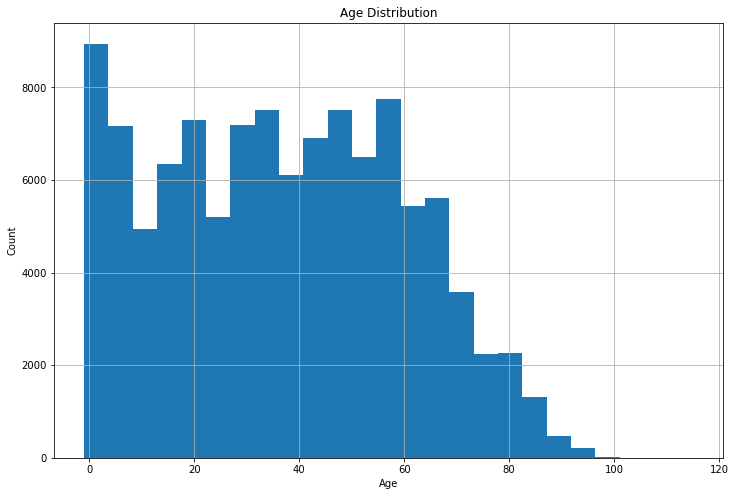

In [53]:
plt.figure(figsize=(12, 8))
df.Age.hist(bins=25)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count');

What are the unique __Handcap__ values?

In [24]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [25]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Looks like __Handcap__ has 199 non binary values. Based on the dataset description from the Kaggle, this should be a binary feature. The value 2, 3 and 4 could have a special meaning from the provider; or, they could be just incorrect entries.

Let's also see how unique the __ID__ features are:

In [26]:
num_unique_pid = df.PatientId.nunique()
num_unique_aid = df.AppointmentID.nunique()
print('Number of unique patient ids are {} and unique appointment ids are {}'.format(num_unique_pid, num_unique_aid))

Number of unique patient ids are 62299 and unique appointment ids are 110527


Looks like the __AppointmentID__ column is a primary key column; probably, it won't be giving too much information for answering our questions.

Also, some patients seem like having multiple appointments. Let's see how the number of appointments change per patient.

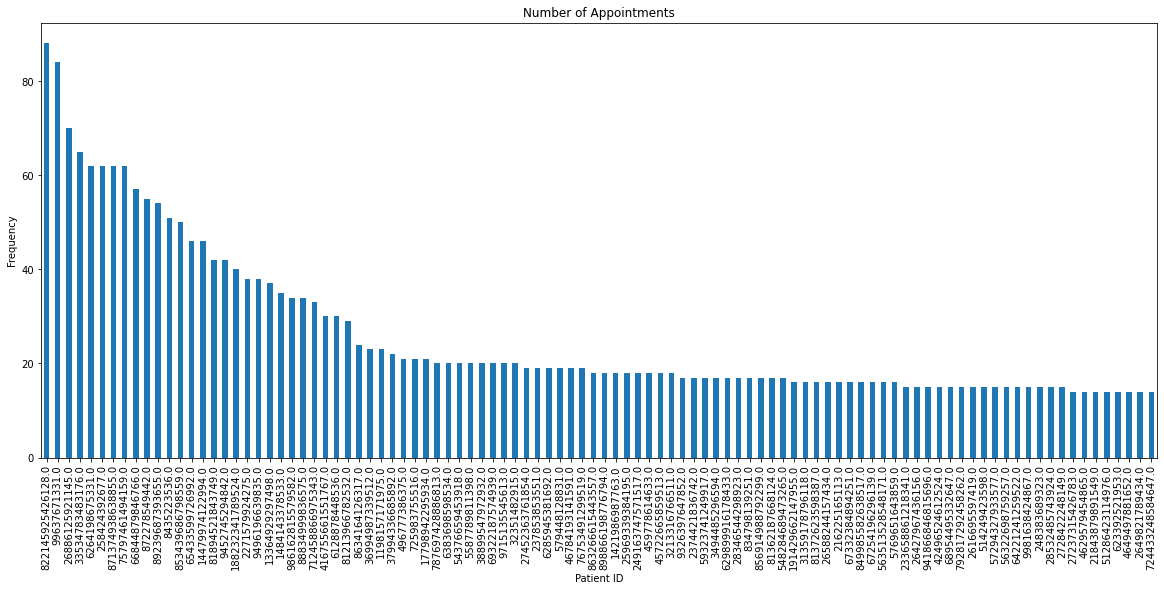

In [48]:
df.PatientId.value_counts().sort_values(ascending=False).head(100).plot(kind='bar', figsize=(20, 8), title='Number of Appointments')
plt.xlabel('Patient ID')
plt.ylabel('Frequency');

Here, we see the distribution of the number of appointments per patient for the top 100 most appointment making patients. There are a few patients who makes too many appointments. Let's see the number of patients who make only one appointment.

In [63]:
num_of_appointments = df.PatientId.value_counts()
print(f'Number of patients making single appointment {len(num_of_appointments.loc[num_of_appointments == 1])}')

Number of patients making single appointment 37920


Looks like more than half of the patients made single appointment.

Also, let's check whether string variables have any errant entries.

In [65]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [70]:
df.Neighbourhood.sort_values().unique()

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
       'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
       'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO',
       'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO',
       'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI',
       'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
       'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH',
       'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE',
       'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',

In [72]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

Last, let's check the validity of the range of dates existing in the data.

In [73]:
print(df.AppointmentDay.min(), df.AppointmentDay.max())

2016-04-29T00:00:00Z 2016-06-08T00:00:00Z


In [74]:
print(df.ScheduledDay.min(), df.ScheduledDay.max())

2015-11-10T07:13:56Z 2016-06-08T20:07:23Z


Ranges seem reasonable for both dates. Also, let's do a sanity check whether all the records have reasonable scheduled dates after the appointment dates.

In [90]:
df.loc[df.ScheduledDay >= df.AppointmentDay].AppointmentID.count()

38568

Wow, looks like the majority of the dataset has errant date information. The rows which have __ScheduledDay__ before the __AppointmentDay__ should be removed.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

Based on the general properties of this dataset, I will execute the following steps to clean this dataset:

- I will change the the type of the __ScheduledDay__ and __AppointmentDay__ column to datetime.
- I will only pick the rows which have a __ScheduledDay__ value after the __AppointmentDay__ value. These are to correct rows to be used to answer our questions.
- I will remove all the rows with age less than 0 and more than 90. It is impossible to have a negative age and it is extremely unlikely to have someone having an appointment after 90. The representation of the sample wouldn't change much based on the plotted histogram in the previous section.
- I will remove any rows which don't have the values 0 or 1 in __Handcap__. Removing these wouldn't change the results much.
- I will drop the __AppointmentID__ column, since this is not a helpful column to answer our questions.
- Last, I will change all the column names. All names will be lowercase; and, all words forming a column name will be seperated by an underscore "\_". Also, I will change the column names __Handcap__ to __Handicap__, __Hipertension__ to __Hypertension__ and __Scholarship__ to __social_welfare__.

In [136]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
clean_df = df.copy(deep=True)

#### Step 1: Change Day Column Type

In [137]:
clean_df.AppointmentDay = pd.to_datetime(clean_df.AppointmentDay)
clean_df.ScheduledDay = pd.to_datetime(clean_df.ScheduledDay)

#### Step 2: Pick The Rows with Scheduled Day After The Appointment Day

In [138]:
clean_df = clean_df.loc[clean_df.ScheduledDay >= clean_df.AppointmentDay]

#### Step 3: Pick The Rows With Age Ranging Between 0 and 90

In [139]:
clean_df = clean_df.query('Age >= 0 and Age <= 90')

#### Step 4: Select Rows With Handcap Values 0 Or 1

In [140]:
clean_df = clean_df.query('Handcap == 0 or Handcap == 1')

#### Step 5: Drop Unnecessary Column

In [141]:
clean_df.drop('AppointmentID', axis=1, inplace=True)

#### Step 6: Change The Column Names

In [142]:
clean_df.rename(columns=lambda x: x.lower().replace('-', '_'), inplace=True)
clean_df.rename(columns={'handcap': 'handicap',
                         'patientid': 'patient_id',
                         'scheduledday': 'scheduled_day',
                         'appointmentday': 'appointment_day',
                         'scholarship': 'social_welfare',
                         'hipertension': 'hypertension'}, inplace=True)

#### Step 7: Sanity Check

In [143]:
clean_df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,social_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [144]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38385 entries, 0 to 110517
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   patient_id       38385 non-null  float64            
 1   gender           38385 non-null  object             
 2   scheduled_day    38385 non-null  datetime64[ns, UTC]
 3   appointment_day  38385 non-null  datetime64[ns, UTC]
 4   age              38385 non-null  int64              
 5   neighbourhood    38385 non-null  object             
 6   social_welfare   38385 non-null  int64              
 7   hypertension     38385 non-null  int64              
 8   diabetes         38385 non-null  int64              
 9   alcoholism       38385 non-null  int64              
 10  handicap         38385 non-null  int64              
 11  sms_received     38385 non-null  int64              
 12  no_show          38385 non-null  object             
dtypes: datetime64[n

In [145]:
clean_df.describe()

,patient_id,age,social_welfare,hypertension,diabetes,alcoholism,handicap,sms_received
count,3.838500e+04,38385.000000,38385.000000,38385.000000,38385.000000,38385.000000,38385.000000,38385.0
mean,1.516840e+14,34.266562,0.108871,0.173714,0.066224,0.040042,0.022040,0.0
std,2.608096e+14,23.027748,0.311481,0.378868,0.248676,0.196060,0.146815,0.0
min,4.374176e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.351389e+12,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.322494e+13,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.534149e+13,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,9.999816e+14,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


The dataset looks clean after all the steps, with reasonable values and column names. Only, I will drop the __sms_received__ column. As, this seems not giving any information to answer our questions.

In [146]:
clean_df.drop('sms_received', axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!